In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
import sys
sys.path.insert(1, '../src/')
from Convex_Bodies import PolyhedronGenerator
from DataGenerator import DataGenerator
from Optimize import LinearAlgorithmOptimization,get_optimization_args

In [11]:
D = 3
CENTROID = [0,0,0]
NUM_VERTICES = 6
RIGHT = False

K = 50
UNIFORM_DIRECTIONS = True
HIGH_LIM = 2*np.pi
RANDOM_SEED = 42.0
SIGMA = 0
X_0_INIT_RANDOM = True


polyhedron_args = {
                "centroid":CENTROID,
                "num_vertices":NUM_VERTICES,
                "right":RIGHT,
                "random_seed":RANDOM_SEED
}

approximation_args = {
                      "k":K,
                      "sigma":SIGMA,
                      "uniform_directions":UNIFORM_DIRECTIONS,
                      "high_lim":HIGH_LIM,
                      "x_0_init_random":X_0_INIT_RANDOM,
                      "seed":RANDOM_SEED
}

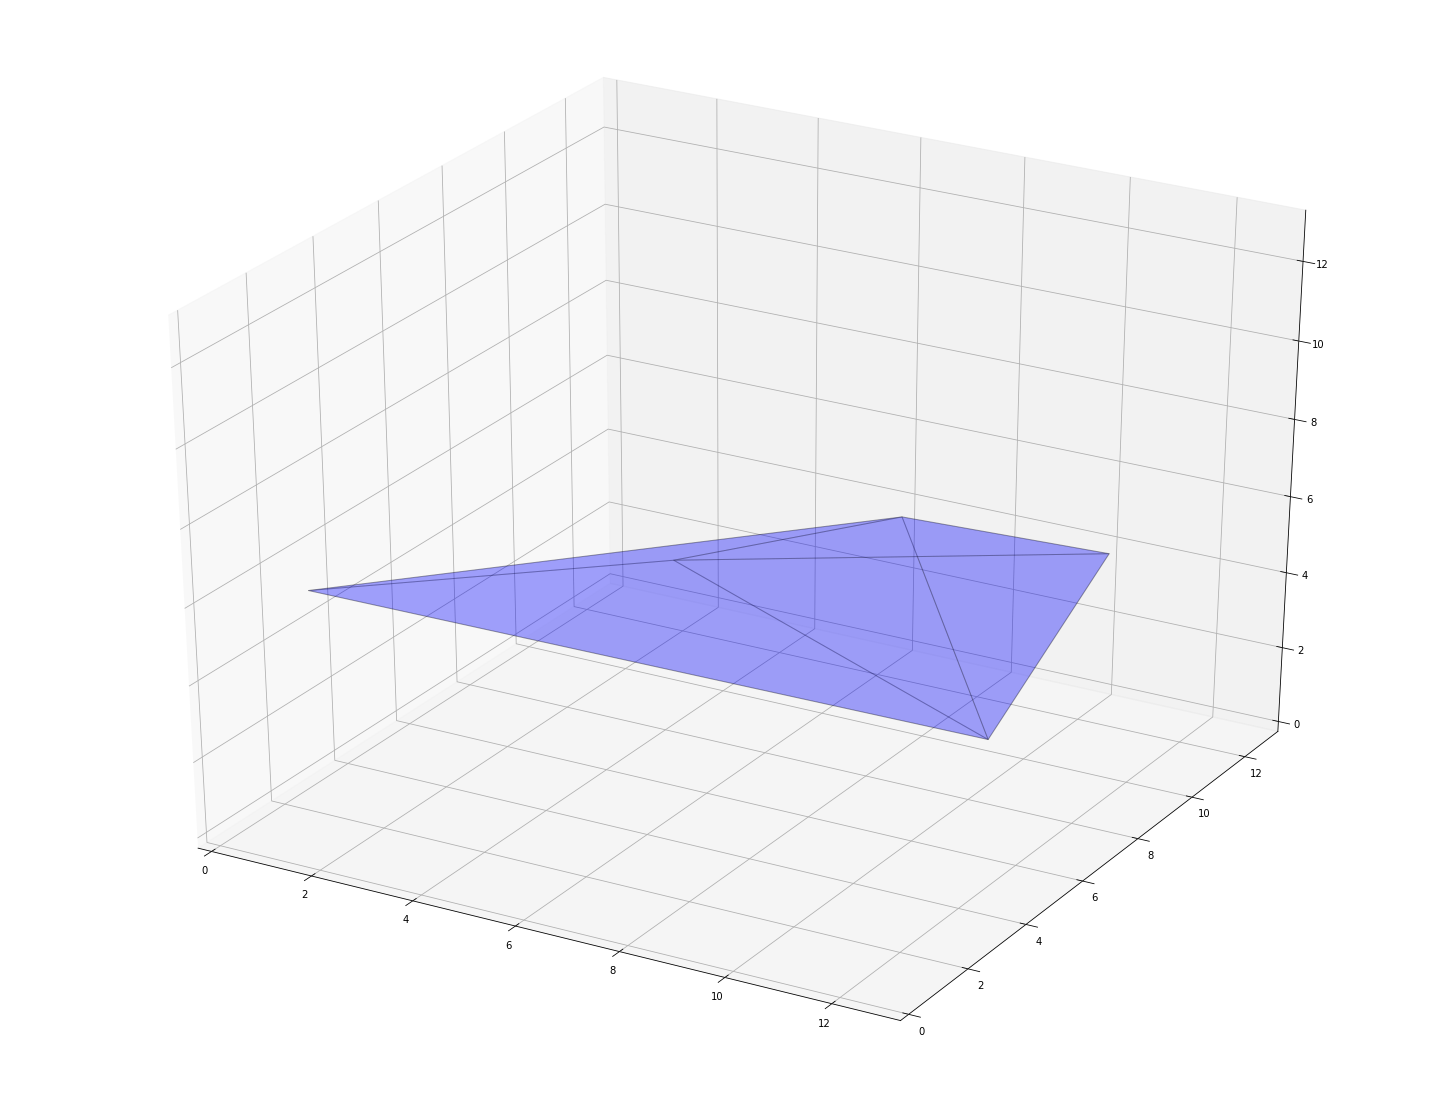

In [12]:
polyhedron_generator = PolyhedronGenerator()


polyhedron,vertices = polyhedron_generator.generate(polyhedron_args)
polyhedron.plot_body()

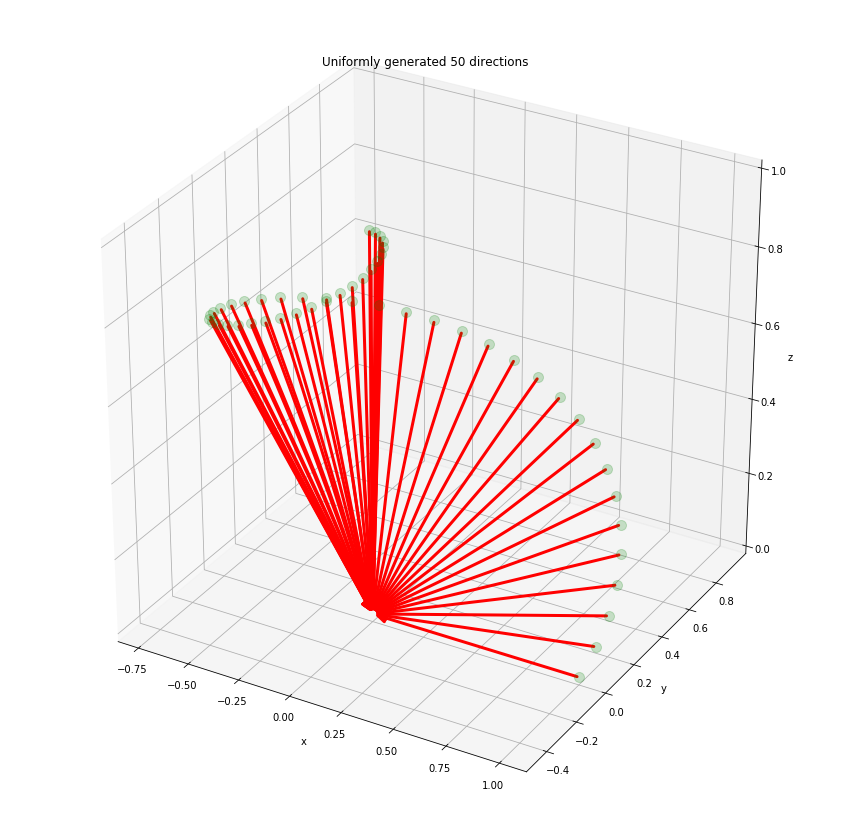

In [13]:
datagen = DataGenerator(d=D)
us = datagen.generate_us(**approximation_args)
datagen.plot_us(us)

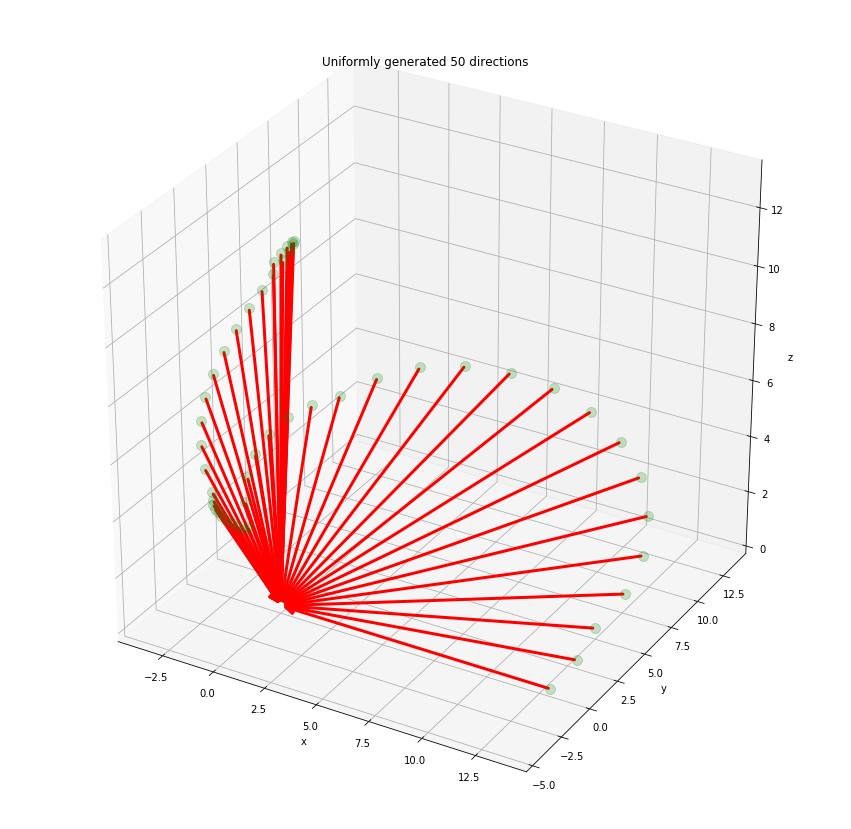

In [14]:
noise_supports = datagen.generate_noise_support(body=polyhedron,us=us,sigma=SIGMA)
datagen.plot_noise_supports(us,noise_supports)

In [15]:
Y, U, X = datagen.get_optimization_params(noise_supports,us,x_random_init=X_0_INIT_RANDOM,d=D)
optimization_args = get_optimization_args(X,Y,U,approximation_args)

In [16]:
solver = LinearAlgorithmOptimization(**optimization_args)
solution = solver.optimize()
X_ = solution.x
X_ = X_.reshape(-1,3)
# polygon.plot_approximation(X_,**approximation_args)

KeyboardInterrupt: 

In [ ]:
from pyConvexHull3D.hull3D import ConvexHull3D

In [ ]:
pts = np.array(X_).reshape(-1,3).astype("float64")

c_hull = ConvexHull3D(pts, run=True, preproc=False, make_frames=False, frames_dir='./frames/')

# self.vertices = c_hull.DCEL.vertexDict.values()
c_hull.generateImage(show=True)